In [36]:
import numpy as np

In [37]:
fish_length = [25.4, 26.3, 26.5, 29.0, 29.0, 29.7, 29.7, 30.0, 30.0, 30.7, 31.0, 31.0, 
                31.5, 32.0, 32.0, 32.0, 33.0, 33.0, 33.5, 33.5, 34.0, 34.0, 34.5, 35.0, 
                35.0, 35.0, 35.0, 36.0, 36.0, 37.0, 38.5, 38.5, 39.5, 41.0, 41.0, 9.8, 
                10.5, 10.6, 11.0, 11.2, 11.3, 11.8, 11.8, 12.0, 12.2, 12.4, 13.0, 14.3, 15.0]
fish_weight = [242.0, 290.0, 340.0, 363.0, 430.0, 450.0, 500.0, 390.0, 450.0, 500.0, 475.0, 500.0, 
                500.0, 340.0, 600.0, 600.0, 700.0, 700.0, 610.0, 650.0, 575.0, 685.0, 620.0, 680.0, 
                700.0, 725.0, 720.0, 714.0, 850.0, 1000.0, 920.0, 955.0, 925.0, 975.0, 950.0, 6.7, 
                7.5, 7.0, 9.7, 9.8, 8.7, 10.0, 9.9, 9.8, 12.2, 13.4, 12.2, 19.7, 19.9]

In [38]:
fish_data = [[l,w] for l,w in zip(fish_length,fish_weight)]
fish_target = [1]*35 + [0]*14

fish_data = np.array(fish_data)

In [39]:
from sklearn.neighbors import KNeighborsClassifier
kn = KNeighborsClassifier()

- 사이킷런을 이용한 데이터 섞기

In [40]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(fish_data, fish_target, random_state=42)

print(x_train.shape, x_test.shape)


(36, 2) (13, 2)


- 수상한 도미 한마리

In [41]:
from sklearn.neighbors import KNeighborsClassifier

kn = KNeighborsClassifier()
kn.fit(x_train, y_train)
kn.score(x_test, y_test)

1.0

In [42]:
print(kn.predict([[25,150]]))

[0]


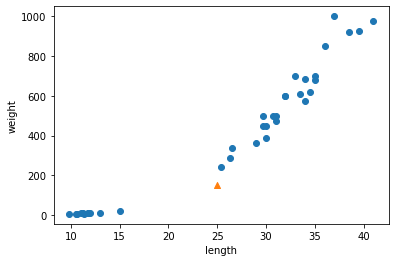

In [43]:
import matplotlib.pyplot as plt
plt.scatter(x_train[:,0], x_train[:,1])
plt.scatter(25, 150, marker='^')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

- 가까운 데이터 찾기

[[12 29  5 19  4]]


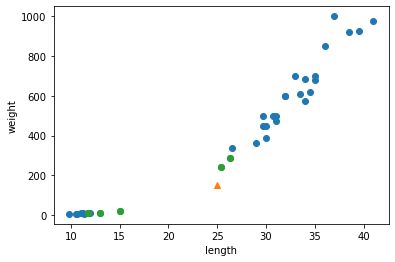

In [44]:
dis, idx = kn.kneighbors([[25,150]])
print(idx)

import matplotlib.pyplot as plt
plt.scatter(x_train[:,0], x_train[:,1])
plt.scatter(25, 150, marker='^')
plt.scatter(x_train[idx,0], x_train[idx,1])
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

- 기준을 맞춰라 

In [50]:
mean = np.mean(x_train, axis=0)
std = np.std(x_train, axis=0)\
    
train_scaled = (x_train - mean) / std

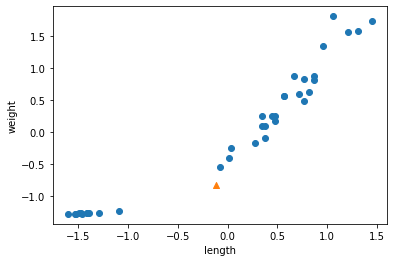

In [51]:
new = ([25, 150] - mean) / std

plt.scatter(train_scaled[:,0], train_scaled[:,1])
plt.scatter(new[0], new[1], marker='^')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

In [52]:
kn.fit(train_scaled, y_train)

KNeighborsClassifier()

In [53]:
test_scaled = (x_test - mean) / std

In [54]:
distances, indexes = kn.kneighbors([new])

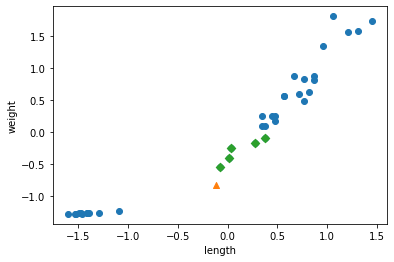

In [55]:
plt.scatter(train_scaled[:,0], train_scaled[:,1])
plt.scatter(new[0], new[1], marker='^')
plt.scatter(train_scaled[indexes,0], train_scaled[indexes,1], marker='D')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()